In [296]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [297]:
# read data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [298]:
train.head(10)

,IMO,NAME,TYPE,BUILD_YEAR,REGISTERED,EFFICIENCY,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EMISSION
0,9354399,DAGMAR,Container ship,2006,yes,EIV (27.84 gCO₂/t·nm),9962,11431,134,226.54
1,9799123,NEW PRIME,Oil tanker,2018,yes,EEDI (2.12 gCO₂/t·nm),159843,311003,333,617.66
2,9102746,MSC DON GIOVANNI,Container ship,1996,yes,EIV (14.32 gCO₂/t·nm),29181,41590,203,400.14
3,9298686,MAERSK IOWA,Container ship,2006,yes,EEDI (19.1 gCO₂/t·nm),50686,61454,292,559.27
4,9302633,MSC FAIRFIELD,Container ship,2006,yes,EIV (20.34 gCO₂/t·nm),90389,111184,336,884.52
5,9139646,KRETA S,container ship,1998,yes,EIV (39.5 gCO₂/t·nm),10384,12238,149,300.92
6,9266865,SEA HOLLY,Oil tanker,2004,yes,EIV (3.83 gCO₂/t·nm),58070,106070,240,422.46
7,9358632,CELSIUS MAYFAIR,Chemical tanker,2007,yes,EIV (11.01 gCO₂/t·nm),11660,20000,141,203.43
8,9629378,SEA CALM,Oil tanker,2013,yes,EIV (3.59 gCO₂/t·nm),164169,318448,333,940.54
9,9380477,SEASPRAT,oil tanker,2007,yes,EIV (8.05 gCO₂/t·nm),26548,40597,188,309.85


In [299]:
test.head(10)

,IMO,NAME,TYPE,BUILD_YEAR,REGISTERED,EFFICIENCY,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH
0,9633185,MORNING CINDY,Vehicle carrier,2012,yes,EIV (16.55 gCO₂/t·nm),59432,18954,199
1,9295971,CMA CGM AMERICA,Container ship,2006,yes,EIV (20.69 gCO₂/t·nm),42382,52683,269
2,9433559,MARINER,Bulk carrier,2009,yes,EIV (5.65 gCO₂/t·nm),32957,57000,190
3,9486312,SIDER VULCANO,General cargo ship,2010,yes,EIV (12.8 gCO₂/t·nm),5214,8108,120
4,9144732,VINCENZO FLORIO,ro-pax ship,1999,yes,EIV (12.35 gCO₂/t·nm),31041,7300,182
5,9283203,MONTE PASCOAL,container ship,2005,yes,EEDI (19.36 gCO₂/t·nm),69132,65066,272
6,9701231,CAMILA,Bulk carrier,2015,yes,EEDI (5.36 gCO₂/t·nm),21532,34334,180
7,9370317,AGIA ELENI,bulk carrier,2008,yes,EIV (6.94 gCO₂/t·nm),17979,29664,171
8,9941673,HELIOS,Oil tanker,2022,yes,EEDI (2.02 gCO₂/t·nm),156471,302093,330
9,9434436,SAMJOHN LEGACY,Bulk carrier,2010,yes,EIV (3.22 gCO₂/t·nm),94995,180736,292


In [300]:
# NaN

print("==========================")
print("Train dataframe:")
print(train.isna().sum())
print("==========================")
print("Test dataframe:")
print(test.isna().sum())
print("==========================")

Train dataframe:
IMO                  0
NAME                 0
TYPE                 0
BUILD_YEAR           0
REGISTERED           0
EFFICIENCY           0
GROSS_TONNAGE        0
SUMMER_DEADWEIGHT    0
LENGTH               0
EMISSION             0
dtype: int64
Test dataframe:
IMO                  0
NAME                 0
TYPE                 0
BUILD_YEAR           0
REGISTERED           0
EFFICIENCY           0
GROSS_TONNAGE        0
SUMMER_DEADWEIGHT    0
LENGTH               0
dtype: int64


In [301]:
# unique

print("==========================")
print("Train dataframe:")
print(train.nunique())
print("==========================")
print("Test dataframe:")
print(test.nunique())
print("==========================")

Train dataframe:
IMO                  10000
NAME                  9876
TYPE                    30
BUILD_YEAR              52
REGISTERED               1
EFFICIENCY            3171
GROSS_TONNAGE         4902
SUMMER_DEADWEIGHT     7684
LENGTH                 272
EMISSION              9039
dtype: int64
Test dataframe:
IMO                  2500
NAME                 2494
TYPE                   30
BUILD_YEAR             49
REGISTERED              1
EFFICIENCY           1576
GROSS_TONNAGE        1940
SUMMER_DEADWEIGHT    2256
LENGTH                230
dtype: int64


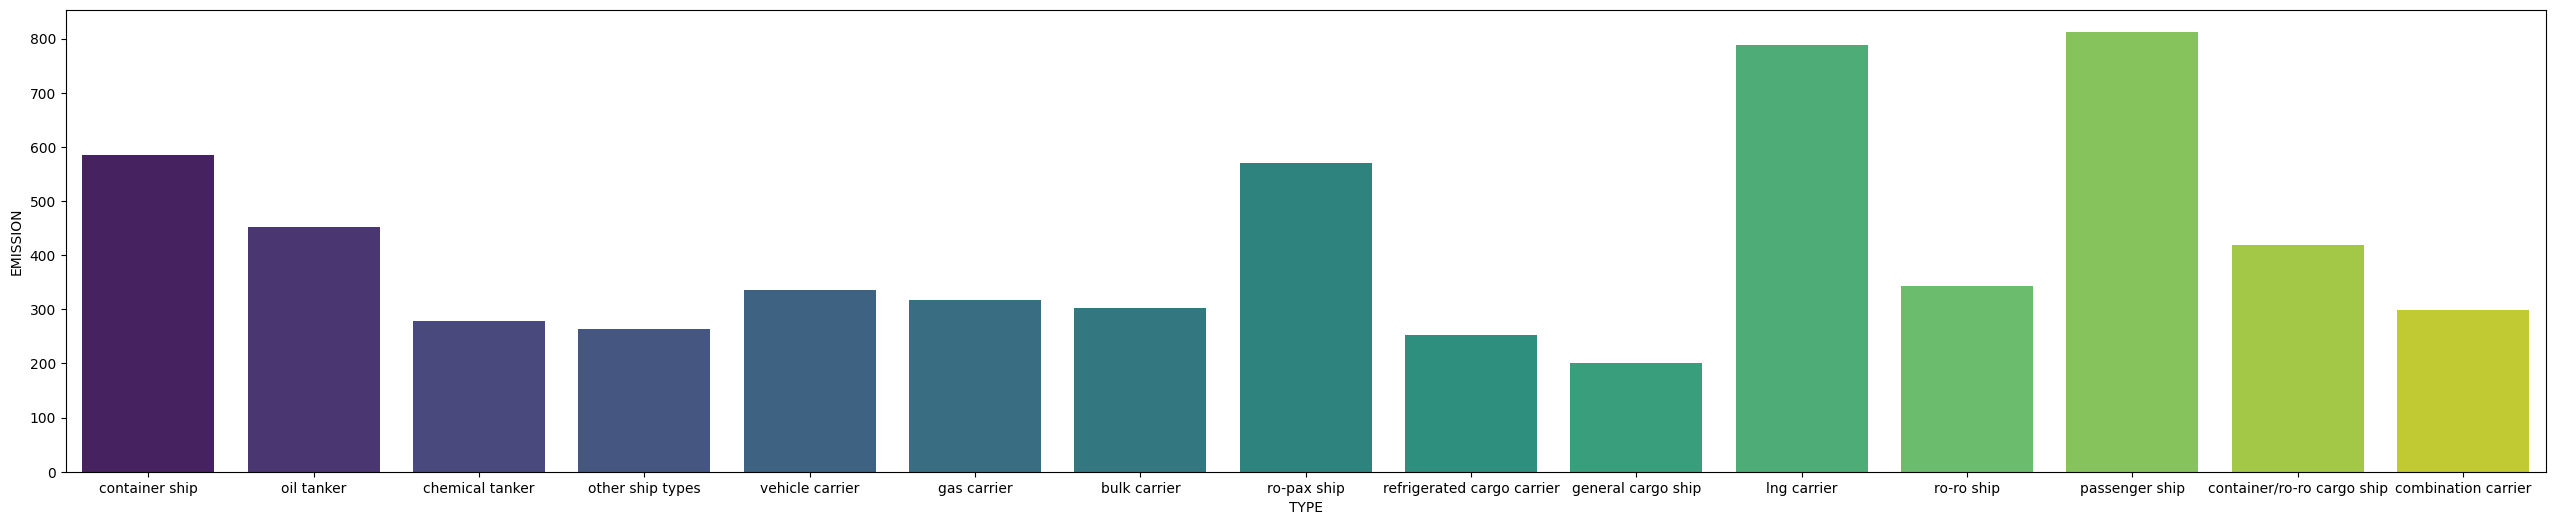

In [302]:
# type

train['TYPE'] = train['TYPE'].str.lower().str.strip()
train['TYPE'] = train['TYPE'].astype(str)

test['TYPE'] = test['TYPE'].str.lower().str.strip()
test['TYPE'] = test['TYPE'].astype(str)

plt.figure(figsize=(32,6))
sns.barplot(x='TYPE', y='EMISSION', data=train, palette='viridis', errorbar=None)
plt.show()

encoder = LabelEncoder()
train['TYPE'] = encoder.fit_transform(train['TYPE'])
test['TYPE'] = encoder.transform(test['TYPE'])

In [303]:
# efficiency

train[['EFFICIENCY_TYPE', 'EFFICIENCY_VALUE']] = train['EFFICIENCY'].str.extract(r'(\w+)\s*\(([\d.]+)')
train['EFFICIENCY_VALUE'] = train['EFFICIENCY_VALUE'].astype(float)

test[['EFFICIENCY_TYPE', 'EFFICIENCY_VALUE']] = test['EFFICIENCY'].str.extract(r'(\w+)\s*\(([\d.]+)')
test['EFFICIENCY_VALUE'] = test['EFFICIENCY_VALUE'].astype(float) 

train = pd.get_dummies(train, columns=['EFFICIENCY_TYPE'], dtype=int)
test = pd.get_dummies(test, columns=['EFFICIENCY_TYPE'], dtype=int)

In [304]:
# drop

train.drop(columns=['EFFICIENCY', 'IMO', 'NAME', 'REGISTERED'], inplace=True)
test.drop(columns=['EFFICIENCY', 'IMO', 'NAME', 'REGISTERED'], inplace=True)

In [305]:
train.head(10)

,TYPE,BUILD_YEAR,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EMISSION,EFFICIENCY_VALUE,EFFICIENCY_TYPE_Applicable,EFFICIENCY_TYPE_EEDI,EFFICIENCY_TYPE_EIV
0,3,2006,9962,11431,134,226.54,27.84,0,0,1
1,8,2018,159843,311003,333,617.66,2.12,0,1,0
2,3,1996,29181,41590,203,400.14,14.32,0,0,1
3,3,2006,50686,61454,292,559.27,19.10,0,1,0
4,3,2006,90389,111184,336,884.52,20.34,0,0,1
5,3,1998,10384,12238,149,300.92,39.50,0,0,1
6,8,2004,58070,106070,240,422.46,3.83,0,0,1
7,1,2007,11660,20000,141,203.43,11.01,0,0,1
8,8,2013,164169,318448,333,940.54,3.59,0,0,1
9,8,2007,26548,40597,188,309.85,8.05,0,0,1


In [306]:
test.head(10)

,TYPE,BUILD_YEAR,GROSS_TONNAGE,SUMMER_DEADWEIGHT,LENGTH,EFFICIENCY_VALUE,EFFICIENCY_TYPE_Applicable,EFFICIENCY_TYPE_EEDI,EFFICIENCY_TYPE_EIV
0,14,2012,59432,18954,199,16.55,0,0,1
1,3,2006,42382,52683,269,20.69,0,0,1
2,0,2009,32957,57000,190,5.65,0,0,1
3,6,2010,5214,8108,120,12.80,0,0,1
4,12,1999,31041,7300,182,12.35,0,0,1
5,3,2005,69132,65066,272,19.36,0,1,0
6,0,2015,21532,34334,180,5.36,0,1,0
7,0,2008,17979,29664,171,6.94,0,0,1
8,8,2022,156471,302093,330,2.02,0,1,0
9,0,2010,94995,180736,292,3.22,0,0,1


In [307]:
# unique

print("==========================")
print("Train dataframe:")
print(train.nunique())
print("==========================")
print("Test dataframe:")
print(test.nunique())
print("==========================")

Train dataframe:
TYPE                            15
BUILD_YEAR                      52
GROSS_TONNAGE                 4902
SUMMER_DEADWEIGHT             7684
LENGTH                         272
EMISSION                      9039
EFFICIENCY_VALUE              2298
EFFICIENCY_TYPE_Applicable       2
EFFICIENCY_TYPE_EEDI             2
EFFICIENCY_TYPE_EIV              2
dtype: int64
Test dataframe:
TYPE                            15
BUILD_YEAR                      49
GROSS_TONNAGE                 1940
SUMMER_DEADWEIGHT             2256
LENGTH                         230
EFFICIENCY_VALUE              1292
EFFICIENCY_TYPE_Applicable       2
EFFICIENCY_TYPE_EEDI             2
EFFICIENCY_TYPE_EIV              2
dtype: int64


In [308]:
train.columns

Index(['TYPE', 'BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH',
       'EMISSION', 'EFFICIENCY_VALUE', 'EFFICIENCY_TYPE_Applicable',
       'EFFICIENCY_TYPE_EEDI', 'EFFICIENCY_TYPE_EIV'],
      dtype='object')

In [309]:
test.columns

Index(['TYPE', 'BUILD_YEAR', 'GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH',
       'EFFICIENCY_VALUE', 'EFFICIENCY_TYPE_Applicable',
       'EFFICIENCY_TYPE_EEDI', 'EFFICIENCY_TYPE_EIV'],
      dtype='object')

In [310]:
# save

train.to_csv('train_df.csv', index=False)
test.to_csv('test_df.csv', index=False)

print('Preprocess completed.')

Preprocess completed.
